# Deterministic seasonality 
- similar intensity
- unchanged periodicity 

In [2]:
import numpy as np
import pandas as pd

In [3]:
size = 120
xt = np.cumsum(np.random.normal(scale=0.1, size=size))

In [38]:
import numpy as np

period = 24
size = 120
beta1 = 0.3
beta2 = 0.6
sin1 = np.asarray([np.sin(2 * np.pi * i / period) for i in np.arange(1, size + 1)])
cos1 = np.asarray([np.cos(2 * np.pi * i / period) for i in np.arange(1, size + 1)])

xt = np.cumsum(np.random.normal(scale=0.1, size=size))

yt = xt + beta1*sin1 + beta2*cos1 + np.random.normal(scale=0.1, size=size)

In [39]:
from statsmodels.tsa.seasonal import STL


series_det = pd.Series(yt)
series_decomp = STL(series_det, period=period).fit()

df = pd.DataFrame({'original': series_det, 'seasonal': series_decomp.seasonal})

In [40]:
dfm = df.reset_index().melt('index')

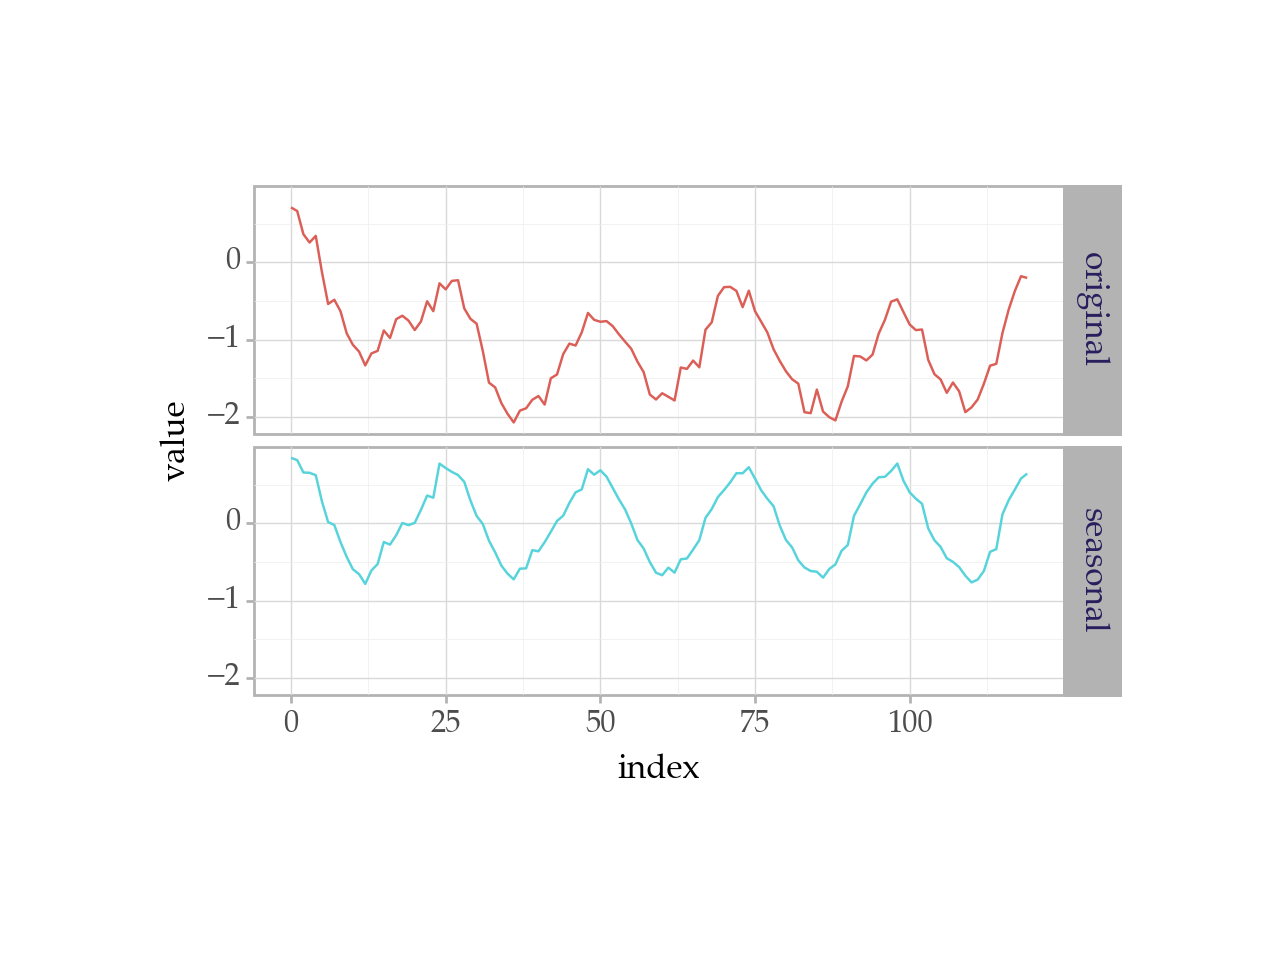

<Figure Size: (640 x 480)>

In [41]:
from plotnine import *
from plotnine.themes import theme_minimal

theme_set(
          theme_light(base_family='Palatino', base_size=12) + \
    theme(plot_margin=.125,
          axis_text=element_text(size=11),
          legend_title=element_blank(),
          strip_text=element_text(size=12, color='#281e5d'),
          legend_position='none')
          )

ggplot(dfm) + facet_grid('variable ~.') + geom_line(aes(x='index', y='value', color='variable'))

# Stochastic stationary seasonality
- intensity less predictable
- periodicity roughly the same

In [42]:
beta1 = np.linspace(0.1, 0.4, size)
beta2 = np.linspace(-.3, .6, size)

In [43]:
sin1 = np.asarray([np.sin(2 * np.pi * i / period) for i in np.arange(1, size + 1)])
cos1 = np.asarray([np.cos(2 * np.pi * i / period) for i in np.arange(1, size + 1)])

xt = np.cumsum(np.random.normal(scale=0.1, size=size))

yt = xt + beta1*sin1 + beta2*cos1 + np.random.normal(scale=0.1, size=size)

In [46]:
series_stoch = pd.Series(yt)
series_seasonal = STL(series_stoch, period=period).fit().seasonal

In [49]:
df = pd.DataFrame({'original': series_stoch, 'seasonal': series_seasonal}).reset_index()
dfm = df.melt('index')

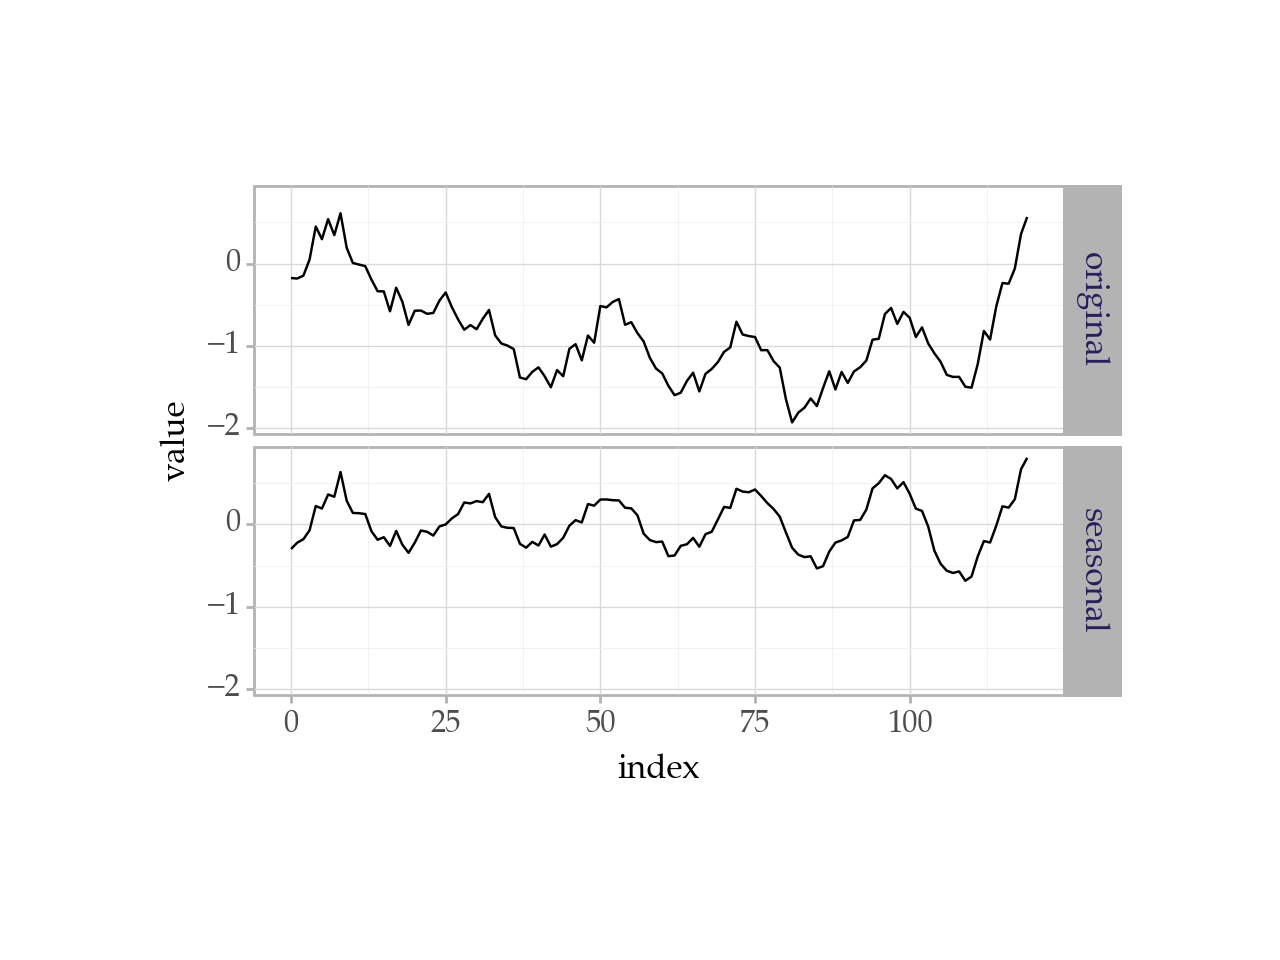

<Figure Size: (640 x 480)>

In [52]:
ggplot(dfm) + facet_grid('variable ~.') + geom_line(aes(x='index', y='value'))

# Seasonal strength 
1 - Var[residuals] / Var[residuals + seasonal]

if above > 0.6, seasonal differencing filter


In [62]:
def seasonal_strength(series: pd.Series) -> float:
    # time series decomposition
    series_decomp = STL(series, period=period).fit()
    
    # variance of residuals + seasonality
    resid_seas_var = (series_decomp.resid + series_decomp.seasonal).var()
    # variance of residuals
    resid_var = series_decomp.resid.var()

    # seasonal strength
    result = 1 - (resid_var / resid_seas_var)

    return result


In [60]:
seasonal_strength(series_det)

0.9399602403113947

In [61]:
seasonal_strength(series_stoch)

0.8459650226015967

In [54]:
stl = STL(series_stoch, period=period).fit()

In [56]:
var_seas_resid = (stl.seasonal + stl.resid).var()
var_resid = stl.resid.var()

In [57]:
result = 1 - (var_resid / var_seas_resid)

In [58]:
result 

0.8459650226015967

# nsdiffs
A common example is the Canova-Hansen (CH) test. Its hypotheses are the following:

- H0 (null hypothesis): The seasonal pattern is stationary (no seasonal unit root);
- H1: The series contains a seasonal unit root

In [69]:
from pmdarima.arima import nsdiffs

nsdiffs(series_det, m=period, test = 'ch')

0

In [67]:

nsdiffs(series_stoch, m=period)

0